# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# **Import dataset**

In [2]:
df=pd.read_csv('/content/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(7050, 16)

# **Exploratory data analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.isna().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe(include='object').T

,count,unique,top,freq
status_id,7050,6997,819700534875473_962061653972693,2
status_type,7050,4,photo,4288
status_published,7050,6913,3/20/2018 1:54,3


In [8]:
df['status_type'].value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


In [9]:
pd.pivot_table(df,index='status_type',values=['num_loves','num_reactions','num_comments','num_shares','num_likes','num_wows','num_hahas','num_sads','num_angrys'],aggfunc='sum')

,num_angrys,num_comments,num_hahas,num_likes,num_loves,num_reactions,num_sads,num_shares,num_wows
status_type,,,,,,,,,
link,0,359,2,23286,19,23319,0,277,12
photo,196,68580,818,766602,6197,777373,611,10951,2936
status,9,13227,40,158968,570,160156,141,934,428
video,593,1499544,4050,567198,82951,661478,966,269997,5714


In [10]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [11]:
#suprimer les 4 colonnes qui contient des nan
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [12]:
df.drop(['status_id','status_published'],axis=1,inplace=True)

# **K-means modele**

In [13]:
x=df
y=df['status_type']

In [14]:
#convert le variables statut_type a une variable numerique
le=LabelEncoder()
x['status_type']=le.fit_transform(x['status_type'])
y=le.transform(y)

In [15]:
cols = x.columns

In [16]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [17]:
x = pd.DataFrame(x, columns=[cols])

In [18]:
#tester le k-means avec k=2
km=KMeans(n_clusters=2,random_state=42,init='k-means++')
km.fit(x)

KMeans(n_clusters=2, random_state=42)

In [19]:
km.inertia_

240.06686397262683

# Use elbow method to find optimal number of clusters

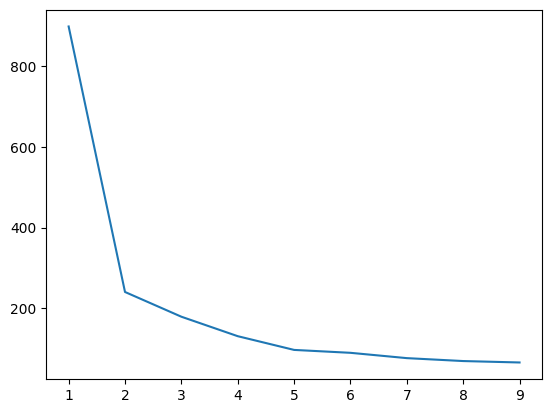

In [20]:
cs=[]
for i in range(1,10):
  km=KMeans(n_clusters=i,init="k-means++",random_state=42)
  km.fit(x)
  cs.append(km.inertia_)

plt.plot(range(1,10),cs)
plt.show()

In [21]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0,
    algorithm='lloyd'
)
kmeans.fit_predict(x)

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [22]:
kmeans.inertia_

127.31833323924432

In [23]:
#verifie les perfermance de modelle
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4347 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


# **Gaussian Mixture Models**

In [24]:
gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    init_params='kmeans',
    n_init=10,
    max_iter=300,
    tol=1e-3,
    random_state=0
)
gmm.fit(x)

GaussianMixture(max_iter=300, n_components=4, n_init=10, random_state=0)

In [25]:
labels_gmm=gmm.predict(x)

correct_labels = sum(y == labels_gmm)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4731 out of 7050 samples were correctly labeled.
Accuracy score: 0.67


# **visualisation kmeans vs GMM**

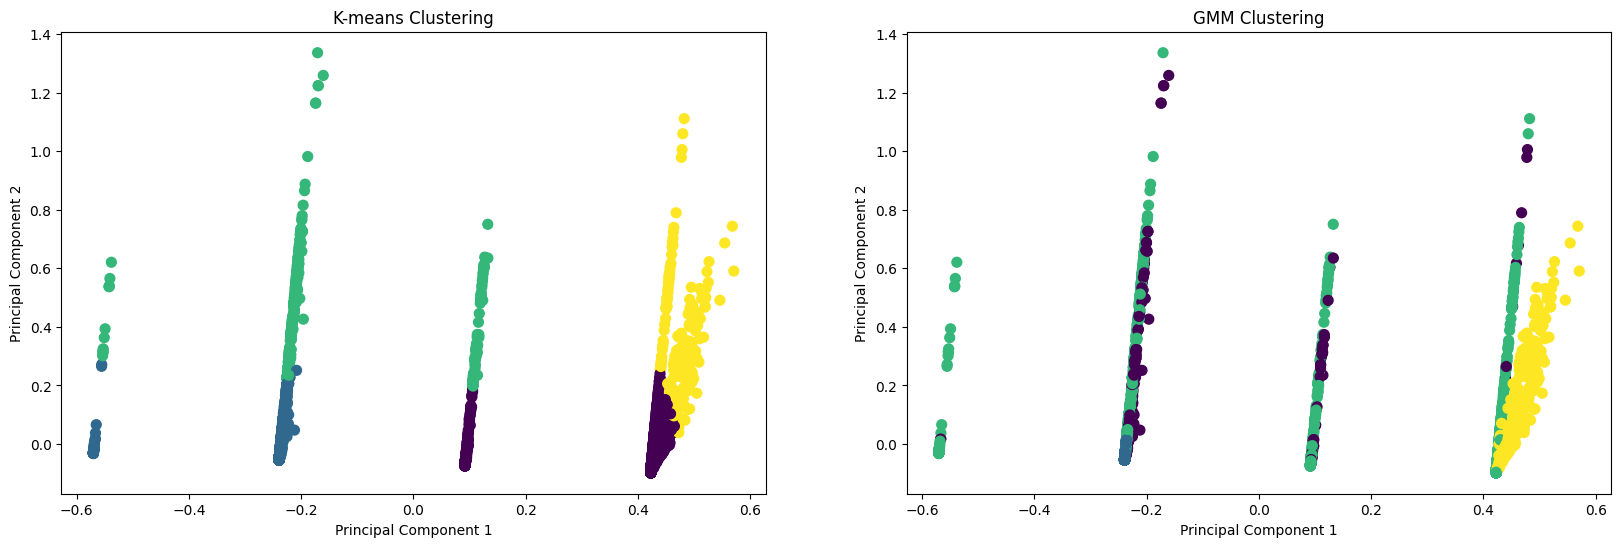

In [26]:
#visualisation k-means vs GMM avec pca
pca=PCA(n_components=2,random_state=0)
x_pca=pca.fit_transform(x)

plt.figure(figsize=(20,6))
#--------kmeans---------
plt.subplot(1,2,1)
plt.scatter(x_pca[:,0],x_pca[:,1], c=labels, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#--------GMM---------
plt.subplot(1,2,2)
plt.scatter(x_pca[:,0],x_pca[:,1], c=labels_gmm, cmap='viridis', s=50)
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

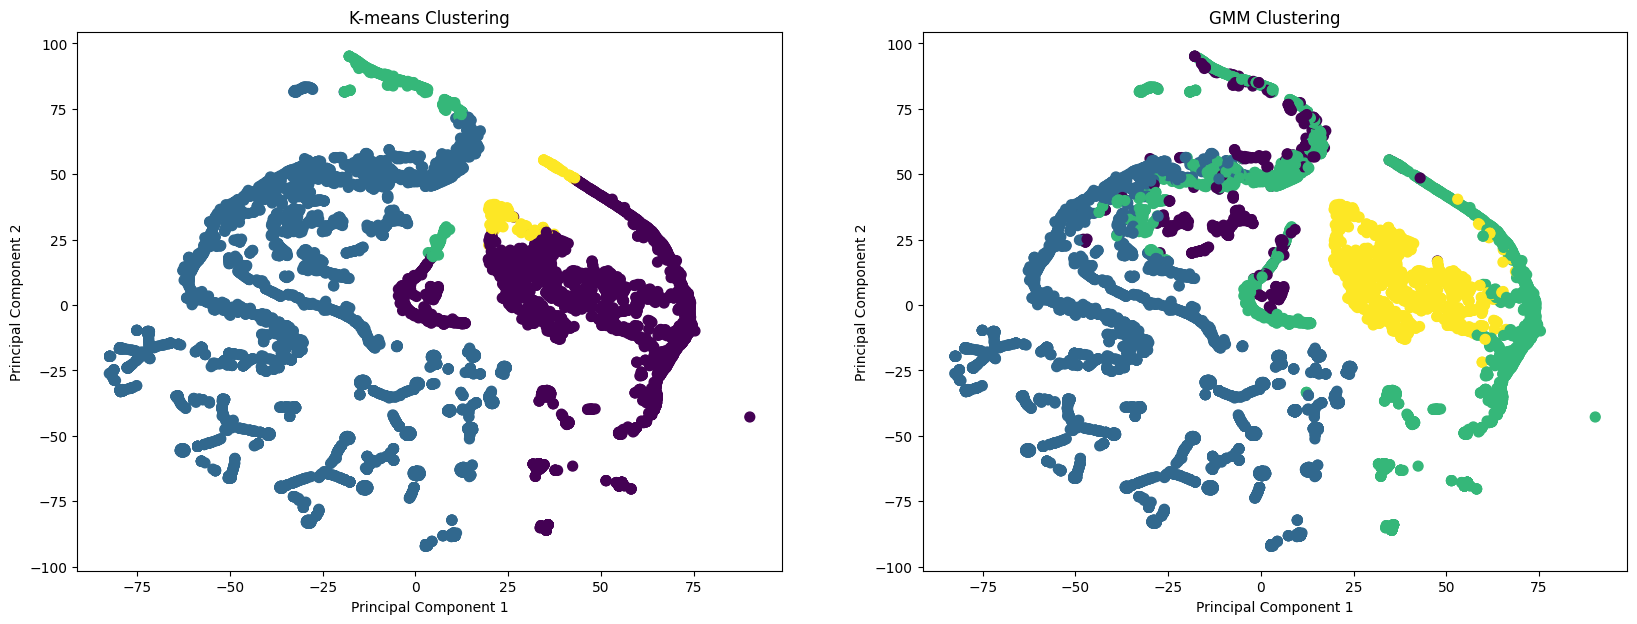

In [27]:
#visualisation kmeans vs GMM avec T-SNE
tsne=TSNE(n_components=2, random_state=0)
x_tsne=tsne.fit_transform(x)

plt.figure(figsize=(20,7))
#----------kmeans----------
plt.subplot(1,2,1)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=labels,cmap="viridis",s=50)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#----------GMM----------
plt.subplot(1,2,2)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=labels_gmm,cmap="viridis",s=50)
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show